In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import pandas as pd
import seaborn as sns

In [2]:
books = pd.read_csv('books.csv')

books.head()

,Title,Author,Genre,Rating
0,Rationality,Steven Pinker,Nonfiction,Liked
1,Time is a Mother,Ocean Vuong,Poetry,DNF
2,Against Empathy,Paul Bloom,Nonfiction,Liked
3,Into the Riverlands,Nghi Vo,Fantasy,Loved
4,The Cosmopolitan Tradition,Martha Nussbaum,Nonfiction,Liked


In [3]:
books[books['Genre'] == 'SciFi']

,Title,Author,Genre,Rating
6,A Closed and Common Orbit,Becky Chambers,SciFi,Loved
8,Record of a Spaceborn Few,Becky Chambers,SciFi,Liked
9,Foundation,Isaac Asimov,SciFi,Disliked
12,The Galaxy and the Ground Within,Becky Chambers,SciFi,Liked
13,Some Desperate Glory,Emily Tesh,SciFi,Liked
16,Unconquerable Sun,Kate Elliott,SciFi,DNF
17,A Psalm for the Wild-Built,Becky Chambers,SciFi,Loved
18,To Be Taught If Fortunate,Becky Chambers,SciFi,Liked
24,A Half-Built Garden,Ruthanna Emrys,SciFi,Loved
26,The Archive Undying,Emma Mieko Candon,SciFi,Liked


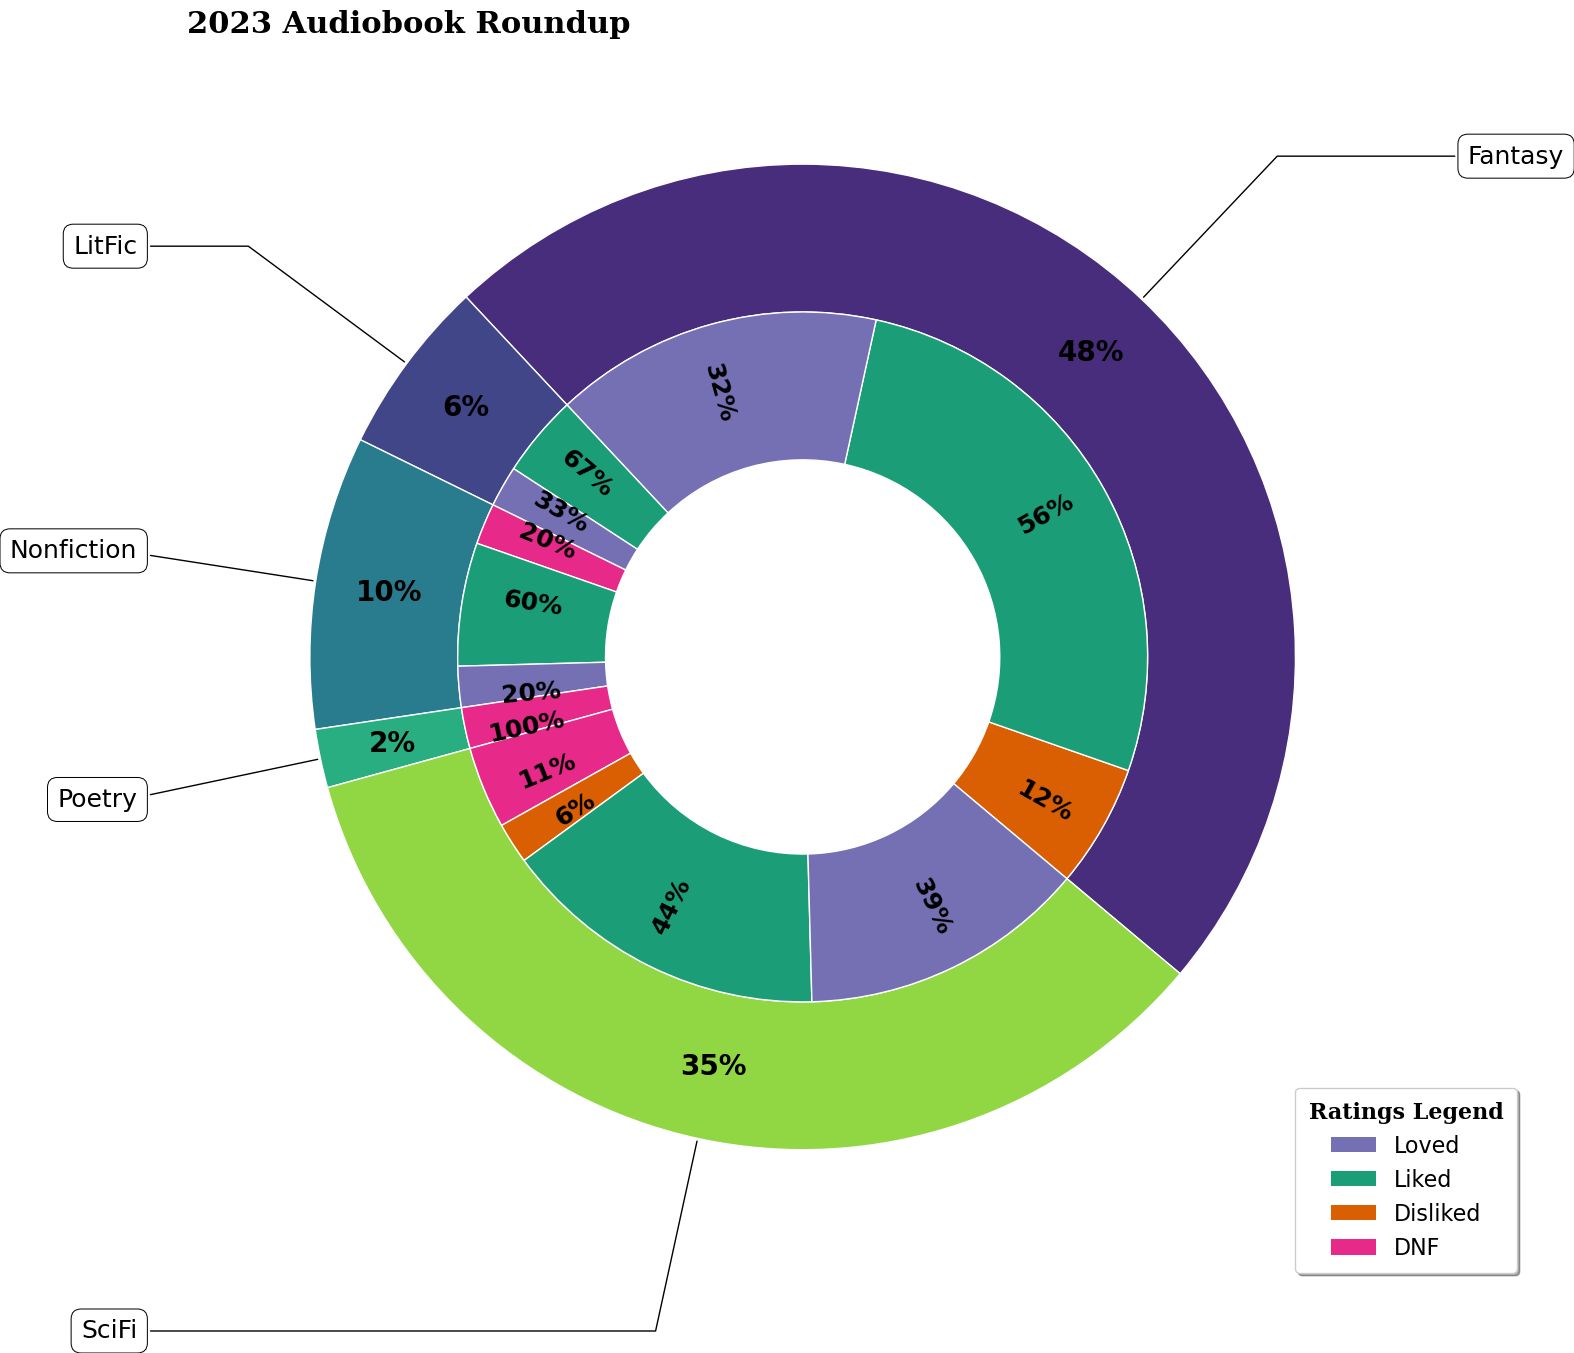

In [4]:
genre_count = books.value_counts('Genre').sort_index()
rating_by_genre = books.groupby('Genre')['Rating'].value_counts().sort_index()
genres = np.asarray(genre_count.index)

size = 0.3
cmap = mpl.colormaps['viridis'].resampled(25)
cmap2 = mpl.colormaps['Dark2']
count_colors = cmap(np.arange(5)*5)
count_colors[0] = cmap(3)

# Defining rating colors
rating_dict = {'Loved': cmap2([2]),
               'Liked': cmap2([0]),
               'Disliked': cmap2([1]),
               'DNF': cmap2([3])
              }

rating_colors = []
for n in range(0, len(rating_by_genre)):
    rating_colors.append(rating_dict[rating_by_genre.index[n][1]])


lgd_elmnts = [Patch(facecolor=rating_dict['Loved'], label='Loved'),
             Patch(facecolor=rating_dict['Liked'], label='Liked'),
             Patch(facecolor=rating_dict['Disliked'], label='Disliked'),
             Patch(facecolor=rating_dict['DNF'], label='DNF')]

pct_labels = []
for i, p in rating_by_genre.keys():
    percentage = 100 * (rating_by_genre[i][p] / (rating_by_genre[i].sum()))
    pct_labels.append(f'{percentage:.0f}%')

fig, ax = plt.subplots(figsize=(16,16))

bbox_props = dict(boxstyle='round,pad=0.4', fc='w', ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle='-'),
          bbox=bbox_props, zorder=0, va='center',
          size=18
         )

wedges, texts, autotexts = ax.pie(genre_count,
                                  wedgeprops=dict(width=0.3, edgecolor='w'),
                                  textprops={'weight':'bold', 'color':'black', 'size': 20},
                                  colors = count_colors,
                                  startangle=-40,
                                  autopct='%1.f%%',
                                  pctdistance=0.85
                                 )

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(genres[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.pie(rating_by_genre,
       radius = 1 - size,
       colors = rating_colors,
       wedgeprops = dict(width=size, edgecolor='w'),
       startangle = -40,
       labels = pct_labels,
       labeldistance = 0.7,
       textprops = {'size': 18, 'color': 'black', 'weight':'bold'},
       rotatelabels = True,
      )

ax.set(aspect='equal')

ax.legend(handles=lgd_elmnts,
          loc=(0.9, 0),
          shadow=True,
          facecolor='w',
          title='Ratings Legend',
          title_fontproperties = {'size': 16,
                                  'weight': 'bold',
                                  'family': 'serif'},
          borderpad=0.6,
          fontsize=16
         )

plt.title('2023 Audiobook Roundup',
          weight='bold',
          size= 22,
          fontfamily = 'serif',
          loc='left')

plt.savefig('audiobook23.png',
            transparent=False,
            format='png'
           )
plt.show()




In [5]:
printable_list = books[['Title', 'Author']].to_numpy().tolist()

with open('bookslist23.txt', 'w') as f:
    f.write('<ul>\n')
    for row in printable_list:
        f.write('<li><i>' + row[0]+'</i>, ' + row[1] + '</li>\n')
    f.write('</ul>\n')

In [6]:
books[['Title', 'Rating']]

,Title,Rating
0,Rationality,Liked
1,Time is a Mother,DNF
2,Against Empathy,Liked
3,Into the Riverlands,Loved
4,The Cosmopolitan Tradition,Liked
5,The Rational Optimist,DNF
6,A Closed and Common Orbit,Loved
7,Fevered Star,Liked
8,Record of a Spaceborn Few,Liked
9,Foundation,Disliked
